In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [215]:
df = pd.read_csv("/kaggle/input/credit-score-classification/train.csv",low_memory=False)


In [216]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [217]:
df.shape

(100000, 28)

In [218]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [220]:
df.drop(["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1,inplace=True)

In [221]:
df["Month"].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

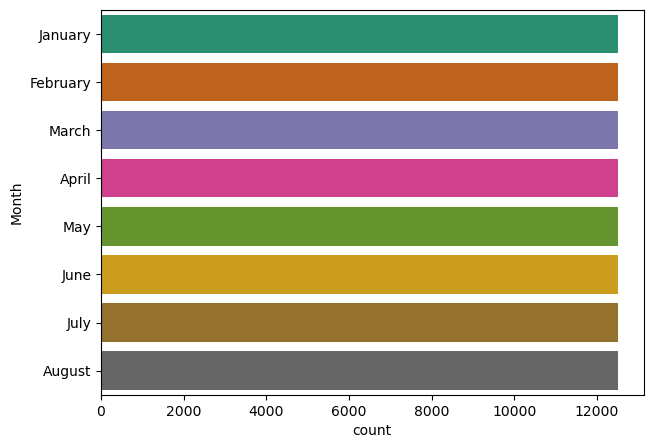

In [222]:
plt.figure(figsize=(7,5))
sns.countplot(y="Month",data=df,palette="Dark2")
plt.show()

In [223]:
month_mapping = {
   'January': 1,
    'February': 2,
    'March': 3,
    "April":4,
    "May":5,
    "June":6,
    "July":7,
    "August":8}
df['Month'] = df['Month'].replace(month_mapping)

In [224]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)

In [225]:
df["Occupation"].value_counts()

Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

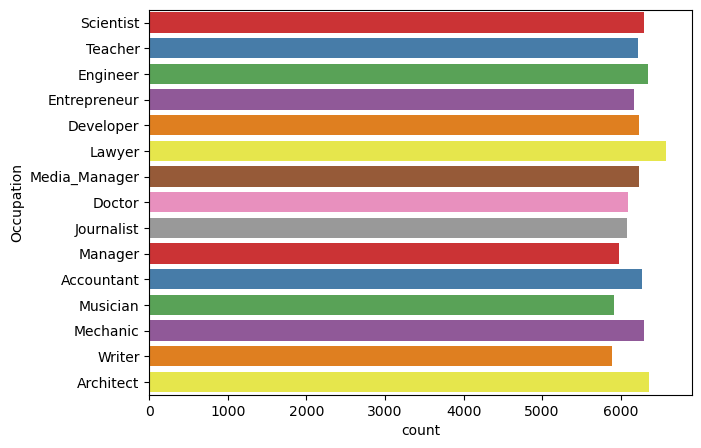

In [226]:
plt.figure(figsize=(7,5))
sns.countplot(y="Occupation",data=df,palette="Set1")
plt.show()

In [227]:
occupation_mapping = {
    'Lawyer': 1,
    'Architect': 2,
    'Engineer': 3,
    'Scientist': 4,
    'Mechanic': 5,
    'Accountant': 6,
    'Developer': 7,
    'Media_Manager': 8,
    'Teacher': 9,
    'Entrepreneur': 10,
    'Doctor': 11,
    'Journalist': 12,
    'Manager': 13,
    'Musician': 14,
    'Writer': 15
}

df['Occupation'] = df['Occupation'].replace(occupation_mapping)


In [228]:
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)

In [229]:
df["Credit_Mix"].value_counts()

Standard    33916
Good        22618
Bad         17630
Name: Credit_Mix, dtype: int64

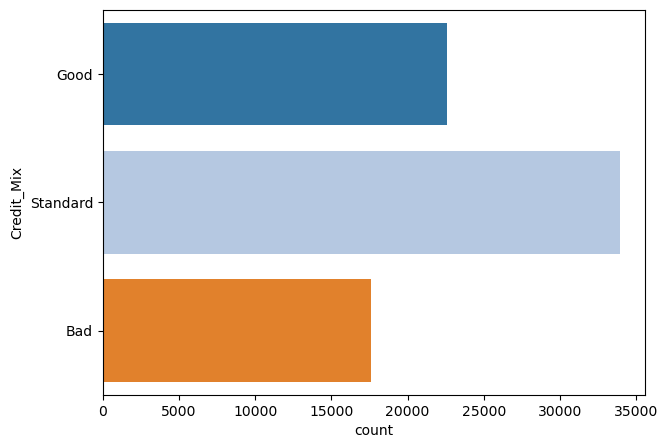

In [230]:
plt.figure(figsize=(7,5))
sns.countplot(y="Credit_Mix",data=df,palette="tab20")
plt.show()

In [231]:
credit_map={"Good":1,"Standard":2,"Bad":3}
df['Credit_Mix'] = df['Credit_Mix'].replace(credit_map)

In [232]:
df["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      18866
High_spent_Medium_value_payments    13075
Low_spent_Medium_value_payments     10304
High_spent_Large_value_payments     10191
High_spent_Small_value_payments      8341
Low_spent_Large_value_payments       7711
!@9#%8                               5676
Name: Payment_Behaviour, dtype: int64

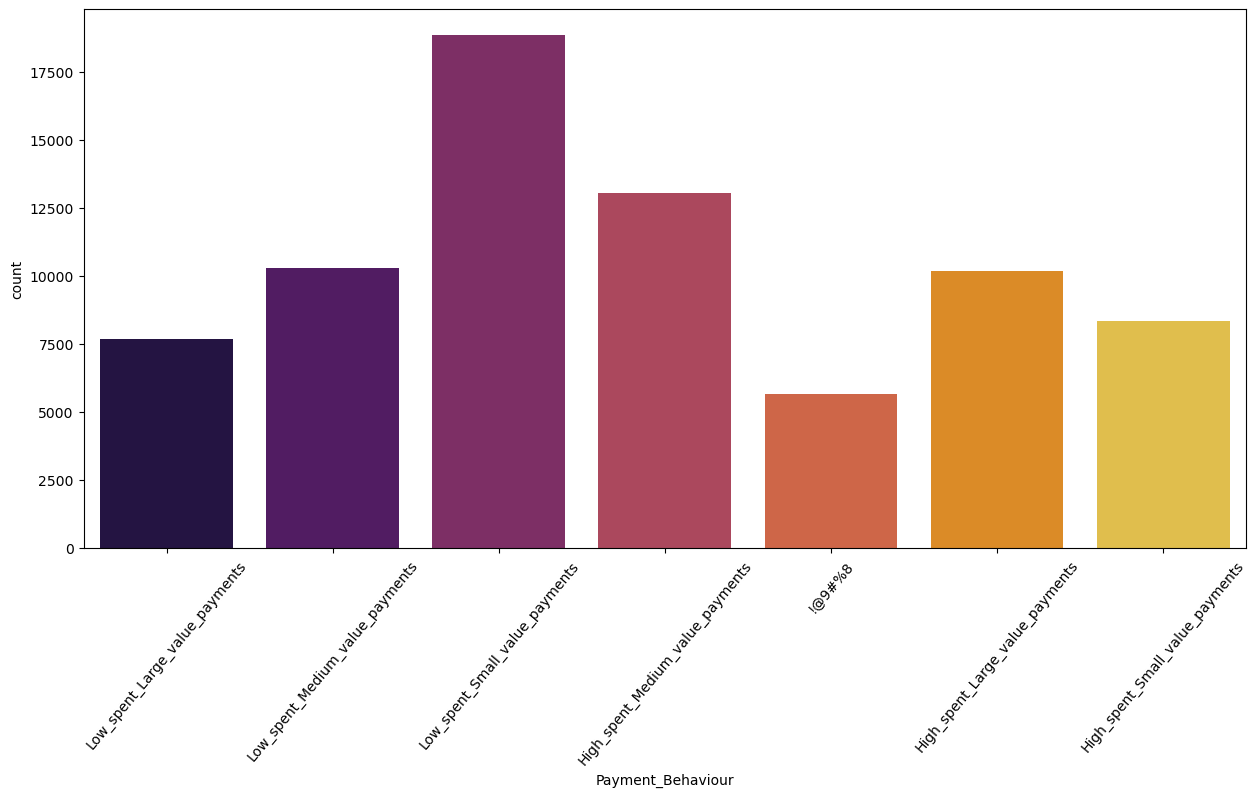

In [233]:
plt.figure(figsize=(15,7))
sns.countplot(x="Payment_Behaviour",data=df,palette="inferno")
plt.xticks(rotation=50)
plt.show()

In [234]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [235]:
category_mapping = {
    'Low_spent_Small_value_payments':1,
    'High_spent_Medium_value_payments':2,
    'Low_spent_Medium_value_payments': 3,
    'High_spent_Large_value_payments': 4,
    'High_spent_Small_value_payments': 5,
    'Low_spent_Large_value_payments': 6
}
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(category_mapping)

In [236]:
df["Credit_Score"].value_counts()

Standard    39441
Poor        21509
Good        13214
Name: Credit_Score, dtype: int64

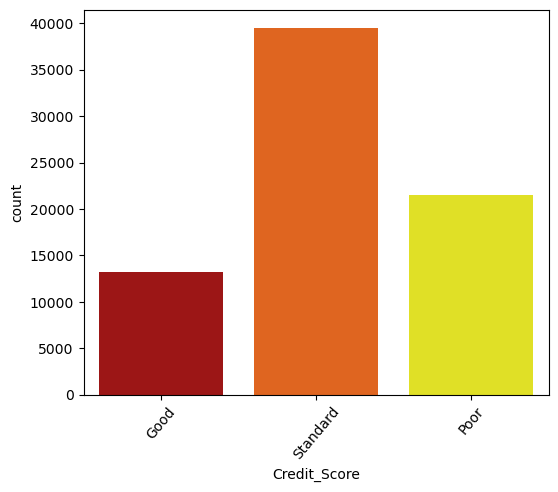

In [237]:
plt.figure(figsize=(6,5))
sns.countplot(x="Credit_Score",data=df,palette="hot")
plt.xticks(rotation=50)
plt.show()

In [238]:
score_map={"Standard":0,"Poor":1,"Good":2}
df['Credit_Score'] = df['Credit_Score'].replace(score_map)

In [239]:
df["Payment_of_Min_Amount"].value_counts()

Yes    38737
No     26501
NM      8926
Name: Payment_of_Min_Amount, dtype: int64

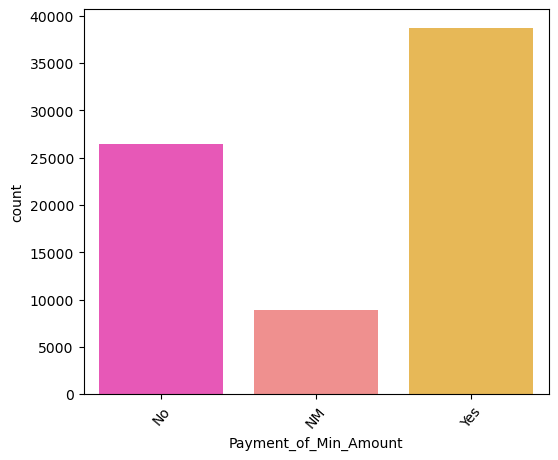

In [240]:
plt.figure(figsize=(6,5))
sns.countplot(x="Payment_of_Min_Amount",data=df,palette="spring")
plt.xticks(rotation=50)
plt.show()

In [241]:
pay_map={"Yes":1,"No":2,"NM":3}
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(pay_map)

# Data Cleaning

In [242]:
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(r'(\d+)')

In [243]:
mean_salary = df["Monthly_Inhand_Salary"].mean()
df["Monthly_Inhand_Salary"].fillna(mean_salary, inplace=True)

# Credit History Age

In [244]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"], errors="coerce")
credit_mean=df["Credit_History_Age"].mean()
df["Credit_History_Age"].fillna(credit_mean, inplace=True)

# Payment Behaviour

In [245]:
df.dropna(subset=["Payment_Behaviour"], inplace=True)


# Monthly_Balance 

In [246]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")
month_mean=df["Monthly_Balance"].mean()
df["Monthly_Balance"].fillna(month_mean, inplace=True)

# Amount_invested_monthly  

In [247]:
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")
invest_mean=df["Amount_invested_monthly"].mean()
df["Amount_invested_monthly"].fillna(invest_mean, inplace=True)

# Num_Credit_Inquiries

In [248]:
in_mean=df["Num_Credit_Inquiries"].mean()
df["Num_Credit_Inquiries"].fillna(in_mean, inplace=True)

# Num_of_Delayed_Payment

In [249]:
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce")
n_mean=df["Num_of_Delayed_Payment"].mean()
df["Num_of_Delayed_Payment"].fillna(n_mean, inplace=True)

In [250]:
object_columns = df.select_dtypes(include=['object'])
object_columns.head()

,Age,Annual_Income,Num_of_Loan,Changed_Credit_Limit,Outstanding_Debt
1,23,19114.12,4,11.27,809.98
2,-500,19114.12,4,_,809.98
3,23,19114.12,4,6.27,809.98
4,23,19114.12,4,11.27,809.98
6,23,19114.12,4,11.27,809.98


In [251]:

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)  # Replace '_' with 0
df['Age'] = df['Age'].replace('-500',np.nan)

# Age

In [252]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
age_mean=df["Age"].mean()
df["Age"].fillna(age_mean, inplace=True)

# Changed_Credit_Limit

In [253]:
df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"], errors="coerce")
c_mean=df["Changed_Credit_Limit"].mean()
df["Changed_Credit_Limit"].fillna(c_mean, inplace=True)

# Annual_Income

In [254]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"], errors="coerce")
an_mean=df["Annual_Income"].mean()
df["Annual_Income"].fillna(an_mean, inplace=True)

# Num_of_Loan

In [255]:

df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"], errors="coerce")
num_mean=df["Num_of_Loan"].mean()
df["Num_of_Loan"].fillna(num_mean, inplace=True)

# Outstanding_Debt


In [256]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')


# Delay_from_due_date

In [257]:
df['Delay_from_due_date'] = df['Delay_from_due_date'].abs()

# Data Visualization

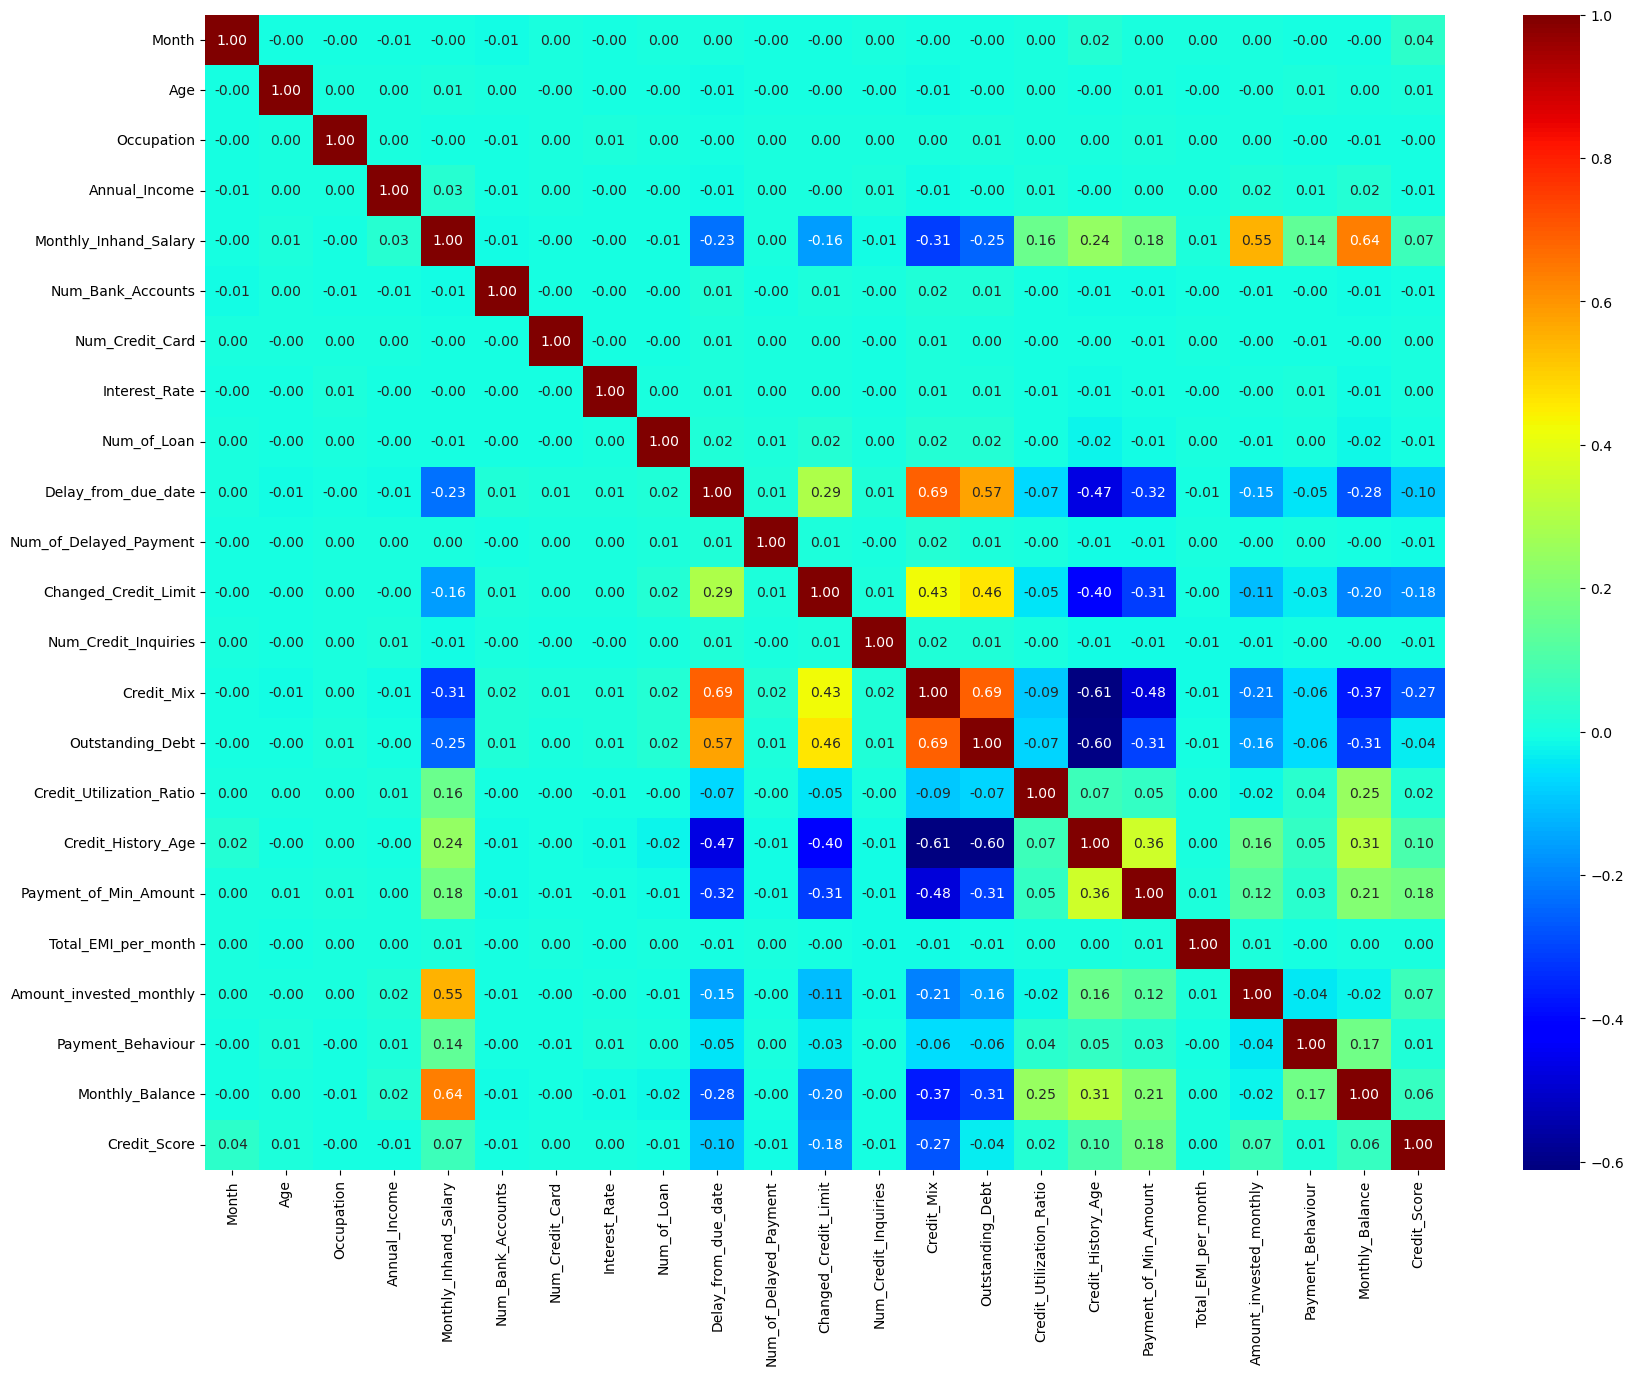

In [258]:
cr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cr,annot=True,fmt=".2f",cmap="jet")
plt.show()

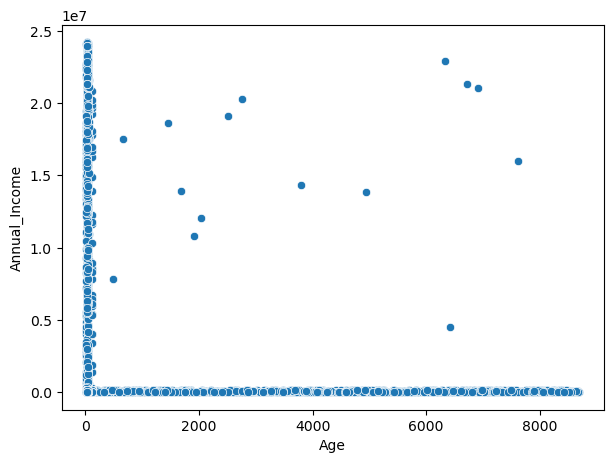

In [259]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Age", y="Annual_Income")
plt.show()

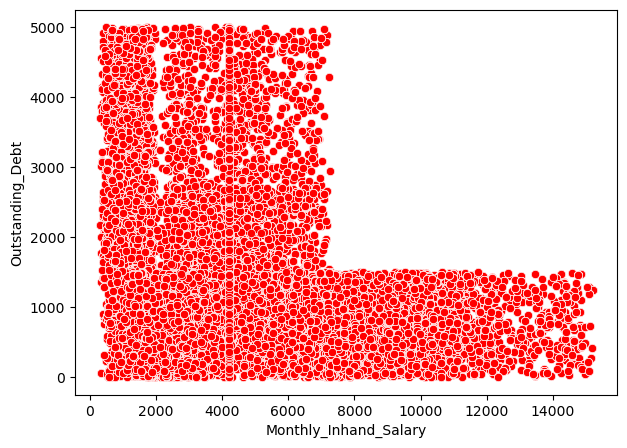

In [260]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()

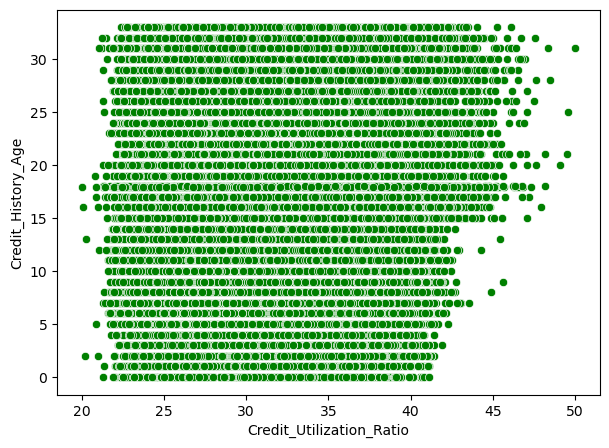

In [261]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="Credit_Utilization_Ratio", y="Credit_History_Age",color="green")
plt.show()

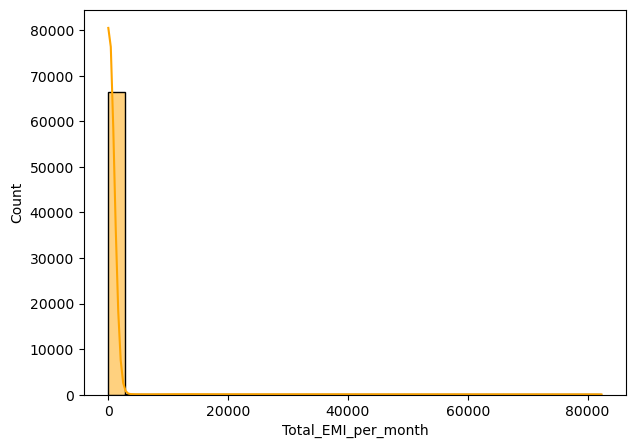

In [262]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Total_EMI_per_month", kde=True,bins=30,color="orange")
plt.show()

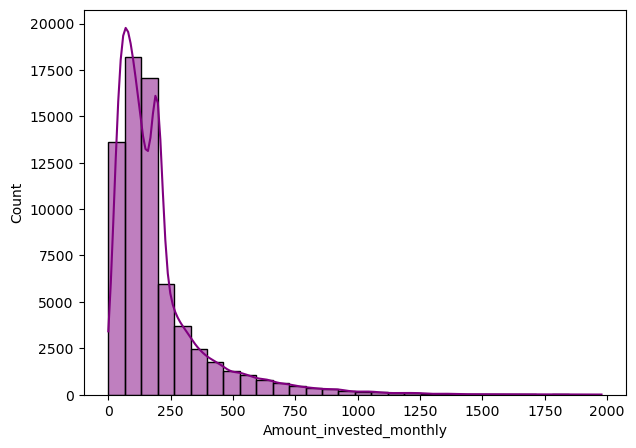

In [263]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Amount_invested_monthly", kde=True,bins=30,color="purple")
plt.show()

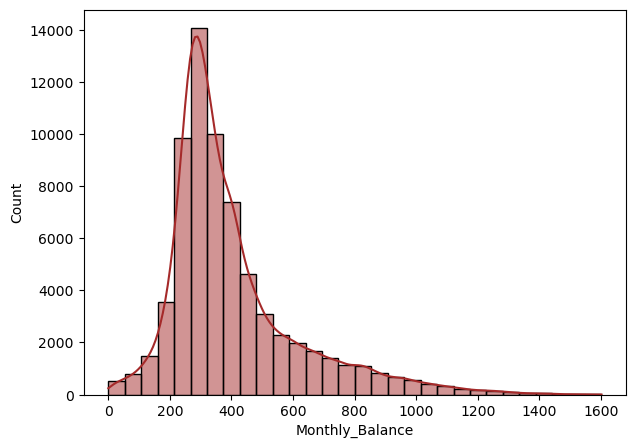

In [264]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Monthly_Balance", kde=True,bins=30,color="brown")
plt.show()

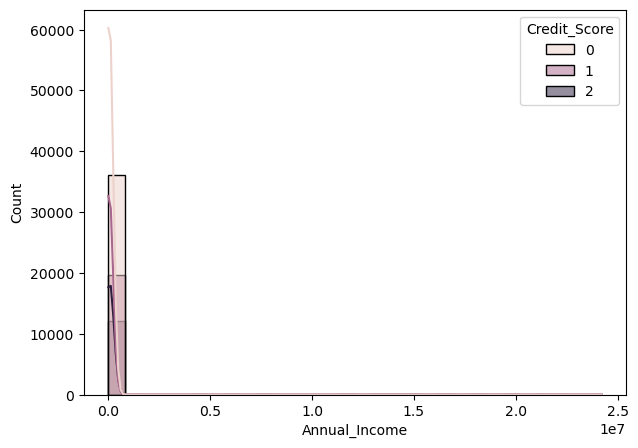

In [265]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x="Annual_Income", kde=True,bins=30,hue="Credit_Score")
plt.show()

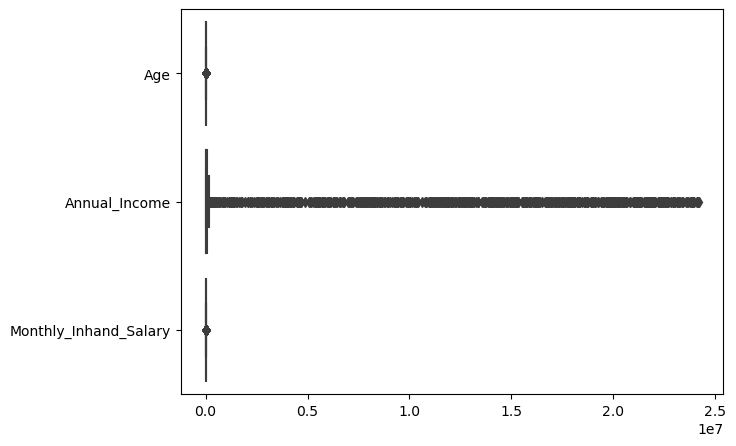

In [266]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[["Age", "Annual_Income","Monthly_Inhand_Salary"]], orient="h")
plt.show()

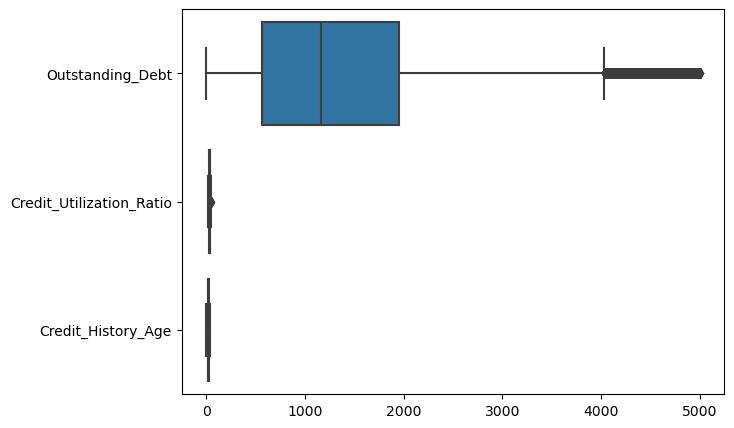

In [267]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[["Outstanding_Debt", "Credit_Utilization_Ratio","Credit_History_Age"]], orient="h")
plt.show()

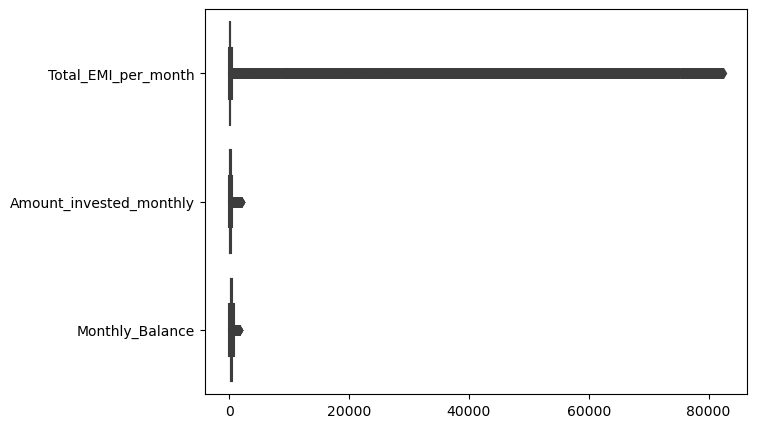

In [268]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[["Total_EMI_per_month", "Amount_invested_monthly","Monthly_Balance"]], orient="h")
plt.show()

# Scale Data

In [269]:
columns_to_scale = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
                    'Amount_invested_monthly', 'Monthly_Balance']
scaler = StandardScaler()


df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [270]:
train_data=df.drop("Credit_Score",axis=1)
label_data=df["Credit_Score"]

In [271]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [272]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss
from xgboost import XGBClassifier

# Extreme Gradient Boosting Classifier

In [273]:
xgb_classifier = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100,eval_metric='logloss', objective='binary:logistic', booster='gbtree')
xgb_classifier.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [274]:
pred=xgb_classifier.predict(xtest)
xgb_ac=accuracy_score(ytest,pred)
print("XGB Accuracy Score :",xgb_ac)

XGB Accuracy Score : 0.7088626076799532


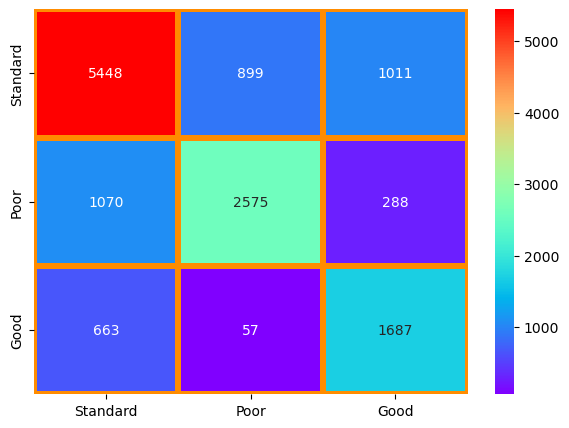

In [275]:
cf_mat=confusion_matrix(ytest, pred)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))

sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="rainbow",lw=4,linecolor="darkorange")
plt.show()

In [276]:
print(classification_report(ytest,pred,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.76      0.74      0.75      7358
        Poor       0.73      0.65      0.69      3933
        Good       0.56      0.70      0.63      2407

    accuracy                           0.71     13698
   macro avg       0.68      0.70      0.69     13698
weighted avg       0.72      0.71      0.71     13698



# Log Loss

In [277]:
x_loss=xgb_classifier.predict_proba(xtest)
logloss = log_loss(ytest,x_loss)
print("Log Loss:", logloss)


Log Loss: 0.6488737030306893


# ROC For XGB

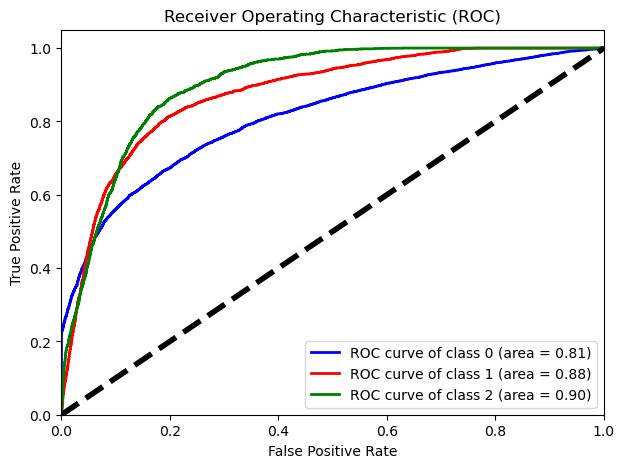

In [278]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,x_loss[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['blue', 'red', 'green']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# LightGBM (Light Gradient Boosting Machine)

In [279]:
from lightgbm import LGBMClassifier
lgb_classifier = LGBMClassifier(boosting_type='gbdt', num_leaves=31,max_depth=-1,learning_rate=0.1,
                                n_estimators=100,     
                          
                                random_state=42,
                                objective='multiclass',  # Multi-class objective
                                metric='multi_logloss')

In [280]:

lgb_classifier.fit(xtrain, ytrain, eval_set=[(xtest, ytest)], verbose=True)



/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 0.9313
[2]	valid_0's multi_logloss: 0.880116
[3]	valid_0's multi_logloss: 0.839001
[4]	valid_0's multi_logloss: 0.80589
[5]	valid_0's multi_logloss: 0.778961
[6]	valid_0's multi_logloss: 0.756546
[7]	valid_0's multi_logloss: 0.738006
[8]	valid_0's multi_logloss: 0.72239
[9]	valid_0's multi_logloss: 0.709284
[10]	valid_0's multi_logloss: 0.698212
[11]	valid_0's multi_logloss: 0.688851
[12]	valid_0's multi_logloss: 0.680759
[13]	valid_0's multi_logloss: 0.673867
[14]	valid_0's multi_logloss: 0.66812
[15]	valid_0's multi_logloss: 0.662887
[16]	valid_0's multi_logloss: 0.658079
[17]	valid_0's multi_logloss: 0.654344
[18]	valid_0's multi_logloss: 0.650842
[19]	valid_0's multi_logloss: 0.647715
[20]	valid_0's multi_logloss: 0.644884
[21]	valid_0's multi_logloss: 0.642357
[22]	valid_0's multi_logloss: 0.640111
[23]	valid_0's multi_logloss: 0.638069
[24]	valid_0's multi_logloss: 0.636233
[25]	valid_0's multi_logloss: 0.634773
[26]	valid_0's multi_logloss: 0.633379


LGBMClassifier(metric='multi_logloss', objective='multiclass', random_state=42)

In [281]:
pred0=lgb_classifier.predict(xtest)
acc0=accuracy_score(ytest,pred0)
print("accuracy score :",acc0)

accuracy score : 0.7297415681121332


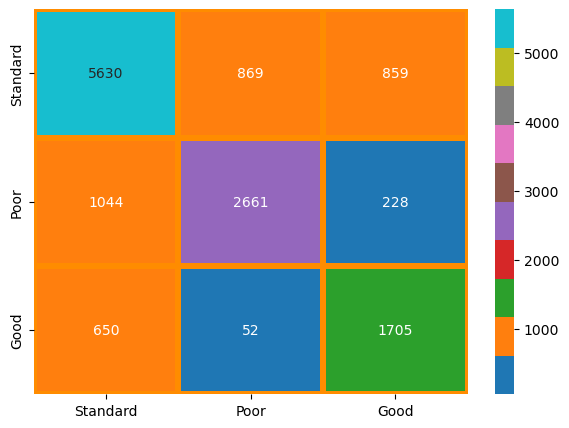

In [282]:
cf_mat=confusion_matrix(ytest, pred0)
label_name=["Standard","Poor","Good"]
plt.figure(figsize=(7,5))
sns.heatmap(cf_mat,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="tab10",lw=4,linecolor="darkorange")
plt.show()

In [283]:
print(classification_report(ytest,pred0,target_names=label_name))

              precision    recall  f1-score   support

    Standard       0.77      0.77      0.77      7358
        Poor       0.74      0.68      0.71      3933
        Good       0.61      0.71      0.66      2407

    accuracy                           0.73     13698
   macro avg       0.71      0.72      0.71     13698
weighted avg       0.73      0.73      0.73     13698



In [284]:
lgb=lgb_classifier.predict_proba(xtest)
logloss2 = log_loss(ytest,lgb)
print("Log Loss:", logloss2)

Log Loss: 0.5990946951818358


# ROC For LGB

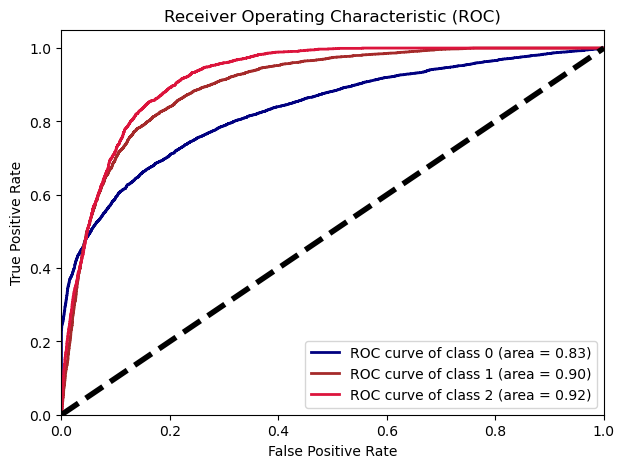

In [285]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = 3  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest,lgb[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(7,5))
colors = ['navy', 'brown', 'crimson']  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Compare Model Result

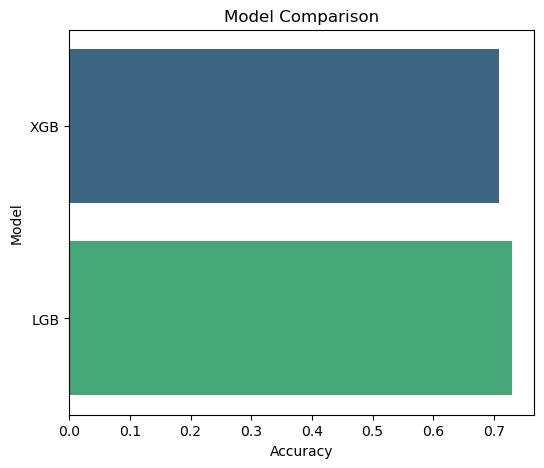

In [288]:
results = {'XGB': xgb_ac,'LGB': acc0}
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison')
plt.show()


# Compare Model Loss

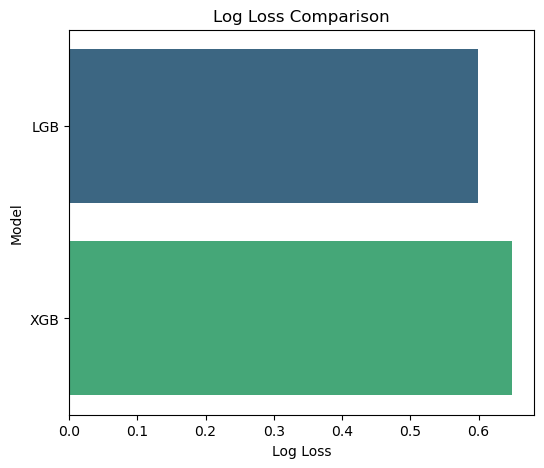

In [290]:
log_loss_results = {'LGB': logloss2,'XGB': logloss}
log_loss_df = pd.DataFrame(list(log_loss_results.items()), columns=['Model', 'Log Loss'])
plt.figure(figsize=(6,5))
sns.barplot(y='Model', x='Log Loss', data=log_loss_df, palette='viridis')
plt.title('Log Loss Comparison')
plt.show()
